# Algoritmo Supervised

##### **Dataset selecionado para realização deste Algoritmo**

- **House Prices - Advanced Regression Techniques**

- https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

## Instalação de Bibliotecas

### **Instalação da Biblioteca `kaggle`**

Neste trecho, foi instalada a biblioteca `kaggle` utilizando o comando `!pip install kaggle` no ambiente de execução. A biblioteca `kaggle` é essencial para interagir com a plataforma Kaggle, permitindo o download de datasets, submissão de soluções para competições e acesso a informações de projetos diretamente por meio de scripts Python.

<br>

### **Importância da Biblioteca:**
A biblioteca `kaggle` facilita o acesso a datasets diretamente do ambiente de trabalho sem precisar fazer downloads manuais pelo site do Kaggle. Ela também possibilita:

- Automatização: Scripts podem ser criados para buscar datasets específicos e manipulá-los automaticamente.
- Integração: Combinações com outras bibliotecas (como pandas) para análise de dados.
- Eficiência: Redução do tempo necessário para configurar e baixar arquivos.

In [116]:
# Instalar a biblioteca Kaggle para fazer download de datasets
!pip install kaggle
!pip install graphviz

## Importações de Bibliotecas

# Bibliotecas Básicas

1. **numpy**: Utilizada para operações matemáticas e manipulação eficiente de arrays multidimensionais.
   - **Exemplo**: Operações com vetores e matrizes.
2. **pandas**: Ferramenta poderosa para manipulação e análise de dados.
   - **Exemplo**: Leitura de datasets e operações em DataFrames.

# Visualização de Dados

3. **seaborn** e **matplotlib.pyplot**: Bibliotecas para criar gráficos e visualizações.
   - **Exemplo**: Visualização de matrizes de confusão e gráficos estatísticos.

# Manipulação de Gráficos

4. **graphviz**: Ferramenta para visualização de grafos, usada principalmente em árvores de decisão.
   - **Exemplo**: Criação de gráficos para árvores treinadas.

# Machine Learning com sklearn

A maior parte das bibliotecas importadas vem do **sklearn**, uma das mais populares para aprendizado de máquina. Algumas das importações principais incluem:

## Pré-processamento:
- **SimpleImputer**: Preenchimento de valores ausentes.
- **MinMaxScaler** e **StandardScaler**: Escalonamento de dados para normalização.
- **LabelEncoder**: Transformação de variáveis categóricas para valores numéricos.

## Modelos de Machine Learning:
- **DecisionTreeClassifier**: Implementação de árvores de decisão.
- **GaussianNB**: Classificador Naive Bayes.
- **KNeighborsClassifier**: Algoritmo K-Nearest Neighbors.

## Métricas:
- **accuracy_score**, **classification_report**: Cálculo de métricas de desempenho.
- **confusion_matrix**: Avaliação de modelos por meio da matriz de confusão.

## Seleção e Validação:
- **GridSearchCV**: Busca pelos melhores hiperparâmetros.
- **train_test_split**: Divisão dos dados em conjuntos de treino e teste.


In [117]:
# Importação de bibliotecas básicas
import numpy as np   # Para operações matemáticas
import pandas as pd  # Para manipulação de dados

import seaborn as sns
import matplotlib.pyplot as plt

from graphviz import Source
from IPython.display import Image

from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

## Carragamento e Leitura do Dataset

### Upload do ficheiro `kaggle.json`

Processo de **carregamento de um ficheiro de credenciais** `kaggle.json` no Google Colab. Este ficheiro contém as credenciais necessárias para acessar a API do Kaggle.

- O utilizador carrega o ficheiro diretamente do computador para o ambiente de execução.
- Após o upload, é exibido o conteúdo do ficheiro, incluindo um identificador de utilizador (`username`) e uma chave de acesso (`key`), que serão usados para autenticação ao utilizar a API do Kaggle.

In [118]:
# Fazer o upload do arquivo kaggle.json, que contém suas credenciais da API do Kaggle
from google.colab import files
files.upload() # Selecionar ficheiro kaggle.json do computador

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"pedrohcvieira","key":"d7356e399e9d90dbe8f3cc8516b7d9d6"}'}

### **Configuração** da Chave de API do Kaggle

Processo de **configuração da chave de API do Kaggle** no ambiente do Google Colab. Para garantir que a API do Kaggle funcione corretamente, são realizadas as seguintes etapas:

**1. Criação de uma pasta oculta** `.kaggle` no diretório principal, onde o ficheiro de credenciais será armazenado.

**2. Cópia do ficheiro** `kaggle.json` para a pasta `.kaggle`, permitindo que a API do Kaggle o localize facilmente.

**3. Ajuste das permissões do ficheiro** para garantir que ele seja acessível apenas para leitura, aumentando a segurança.

In [119]:
# Configurar a chave da API do Kaggle no ambiente do Colab
!mkdir ~/.kaggle  # Criar a pasta .kaggle
!cp kaggle.json ~/.kaggle/  # Copiar o ficheiro kaggle.json para a pasta
!chmod 600 ~/.kaggle/kaggle.json  # Ajustar permissões de leitura para a chave

mkdir: cannot create directory ‘/root/.kaggle’: File exists


### **Download** e **Unzip** do dataset do ``Kaggle``

Processo de **download e extração de um dataset do Kaggle** no Google Colab. Os passos realizados incluem:

**1. Download do dataset:** Através do comando da API do Kaggle, o dataset relacionado à competição "house-prices-advanced-regression-techniques" é transferido para o ambiente Colab. O progresso do download é exibido, incluindo a taxa de transferência e o tamanho total do arquivo.

**2. Extração dos ficheiros (unzip):** O arquivo ZIP contendo o dataset é descompactado. Os ficheiros extraídos, como `data_description.txt`, `sample_submission.csv`, `test.csv` e `train.csv`, estão agora disponíveis para utilização no ambiente de trabalho.

In [120]:
# Download do dataset da competição do Kaggle
!kaggle competitions download -c house-prices-advanced-regression-techniques

# Unzip do ficheiro onde foi feito download do Kaggle
!unzip house-prices-advanced-regression-techniques.zip

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


### **Importação** e **Listagem** do Dataset no `Pandas`

Processo de carregamento de um **arquivo CSV** chamado `train.csv` em um DataFrame do Pandas.

- Em seguida, são exibidas as primeiras cinco linhas do dataset para inspecionar o conteúdo e verificar a estrutura das colunas e dos dados. Cada linha representa uma observação, enquanto as colunas contêm diferentes variáveis do dataset, como `Id`, `MSSubClass`, `MSZoning`, entre outras. Essa etapa é essencial para entender a organização inicial do dataset e identificar possíveis inconsistências ou valores ausentes.

In [121]:
# Carregar o ficheiro CSV no DataFrame
data = pd.read_csv('train.csv')

train_data = pd.DataFrame(data)

train_data.head()  # Exibir as primeiras linhas do dataset para verificar

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Inspecionar as primeiras linhas

# Exibição das Primeiras Linhas do Dataset

Neste trecho do código:

1. **Obtenção das Primeiras Linhas**:
   - A variável `head_data` armazena as 5 primeiras linhas do dataset, obtidas com o método `data.head()`.

2. **Estilização da Tabela**:
   - O objeto `head_styled` é uma versão estilizada de `head_data`:
     - Utiliza a função `style.background_gradient` para aplicar cores às colunas numéricas, como `LotFrontage` e `LotArea`.
     - Apenas as colunas com tipos `float64` e `int64` são destacadas.

3. **Resultado**:
   - Na saída, as colunas `LotFrontage` e `LotArea`, por exemplo, apresentam um gradiente de cores indicando seus valores relativos.
   - Os valores numéricos são destacados enquanto as colunas categóricas (`Street`, `Alley`, etc.) permanecem sem formatação especial.

O resultado final facilita a visualização de variações entre os valores numéricos do dataset logo nas primeiras linhas.


In [122]:
# Exibir as primeiras 5 linhas do dataset
#print(data.head())

# Obter as primeiras 5 linhas do dataset
head_data = data.head()

# Aplicar estilo à tabela
head_styled = head_data.style.background_gradient(cmap='coolwarm', subset=data.select_dtypes(include=['float64', 'int64']).columns)\
                            .set_caption("Primeiras 5 Linhas do Dataset")\
                            .format(precision=2)

# Exibir a tabela estilizada
head_styled

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,nan,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,nan,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000


### Verificar a Estrutura do Dataset

- **Descrição do Código:** Este trecho cria um novo `DataFrame` chamado `info`, que contém informações essenciais sobre as colunas do dataset:

  - **Column:** Nome de cada coluna.
  - **Non-Null Count:** Quantidade de valores presentes (não nulos) em cada coluna.
  - **Dtype:** Tipo de dado de cada coluna.

<br>

- **Comparação com o Resultado:**

  - Por exemplo, a coluna `MSSubClass` contém 1.460 valores não nulos (`Non-Null Count`) e é do tipo `int64`. Já a coluna `Alley` possui apenas 91 valores não nulos e 1.369 valores nulos.

In [123]:
# Informações sobre o dataset

# Obter a informação do dataset
info = pd.DataFrame({
    'Column': data.columns,
    'Non-Null Count': data.notnull().sum().values,
    'Dtype': data.dtypes.values
})

# Adicionar a contagem de valores nulos
info['Null Count'] = len(data) - info['Non-Null Count']

# Aplicar estilo à tabela
info_styled = info.style.background_gradient(subset=['Non-Null Count'], cmap='coolwarm').format({'Non-Null Count': '{:,.0f}', 'Null Count': '{:,.0f}'})

# Exibir a tabela formatada
info_styled

,Column,Non-Null Count,Dtype,Null Count
0,Id,"1,460",int64,0
1,MSSubClass,"1,460",int64,0
2,MSZoning,"1,460",object,0
3,LotFrontage,"1,201",float64,259
4,LotArea,"1,460",int64,0
5,Street,"1,460",object,0
6,Alley,91,object,"1,369"
7,LotShape,"1,460",object,0
8,LandContour,"1,460",object,0
9,Utilities,"1,460",object,0


## Gráfico de Barras do Resultado

Na imagem apresentada, é exibido um gráfico de barras que mostra a contagem de valores nulos (ausentes) por coluna no dataset. As colunas são ordenadas de forma decrescente pelo número de valores nulos, ou seja, as colunas com mais valores ausentes aparecem no topo do gráfico.

- **Eixo Y (Vertical):** Lista os nomes das colunas do dataset.
- **Eixo X (Horizontal):** Mostra a contagem de valores nulos em cada coluna.
- **Visualização:** As barras em azul claro indicam visualmente a quantidade de valores nulos para cada coluna, permitindo identificar rapidamente quais colunas têm muitos dados ausentes.

<br>

Este gráfico facilita a análise exploratória, destacando as colunas que podem necessitar de tratamento adicional, como preenchimento ou remoção, antes de prosseguir com o pré-processamento dos dados.

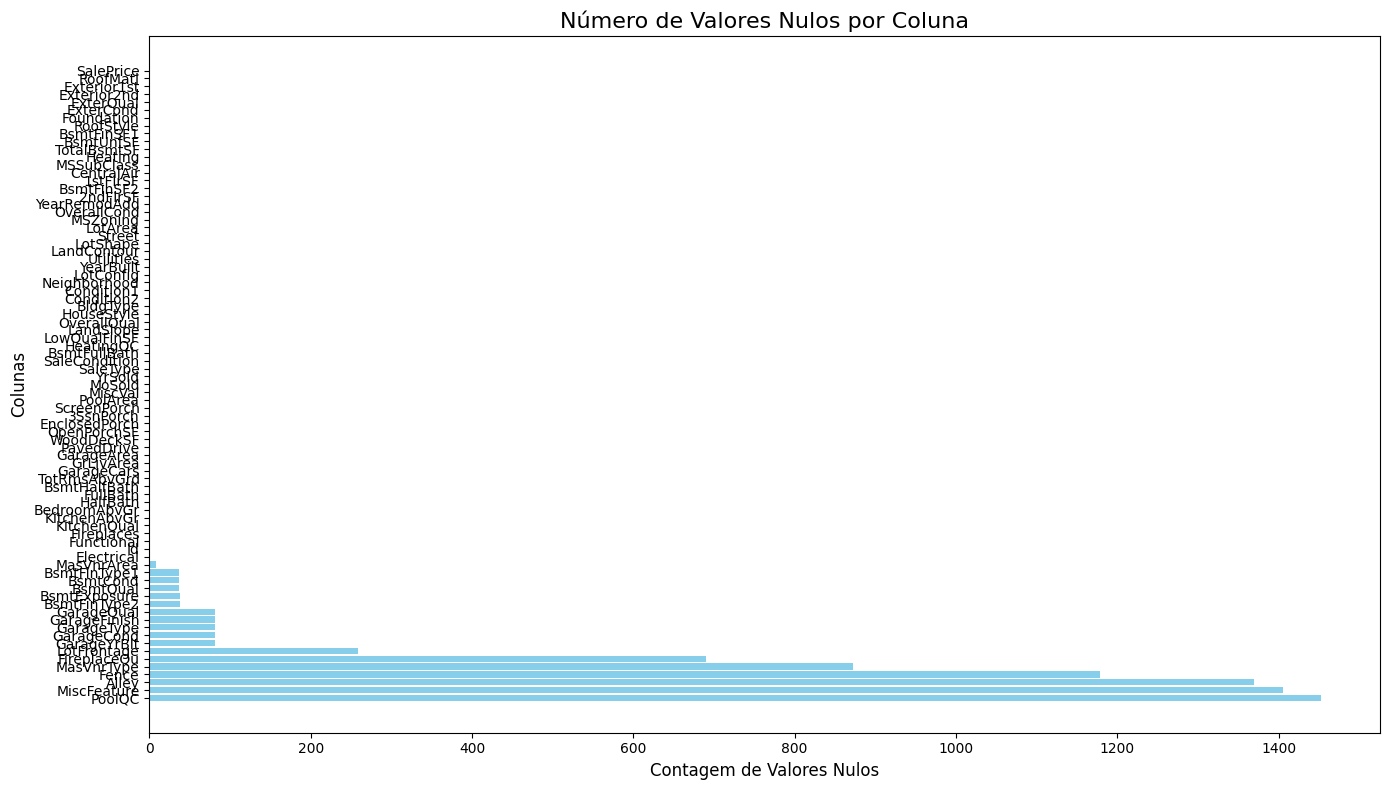

In [124]:
# Ordenar colunas pelo número de valores nulos
null_counts = info[['Column', 'Null Count']].sort_values(by='Null Count', ascending=False)

# Criar o gráfico
plt.figure(figsize=(14, 8))
plt.barh(null_counts['Column'], null_counts['Null Count'], color='skyblue')
plt.title('Número de Valores Nulos por Coluna', fontsize=16)
plt.xlabel('Contagem de Valores Nulos', fontsize=12)
plt.ylabel('Colunas', fontsize=12)
plt.tight_layout()
plt.show()

### Resumir Estatísticas das Colunas Numéricas

A imagem apresenta uma tabela com as estatísticas descritivas das colunas numéricas do dataset. Essas estatísticas são úteis para entender a distribuição dos dados e incluem:

- **Count:** O número de valores não nulos em cada coluna.
- **Mean:** A média dos valores da coluna.
- **Std:** O desvio padrão, indicando a dispersão dos valores em relação à média.
- **Min:** O menor valor encontrado na coluna.
- **25%** (1º quartil): O valor abaixo do qual 25% dos dados estão localizados.
- **50%** (mediana): O valor central da distribuição dos dados.
- **75%** (3º quartil): O valor abaixo do qual 75% dos dados estão localizados.
- **Max:** O maior valor encontrado na coluna.

<br>

A tabela também está estilizada com um gradiente de cores que destaca os valores mais altos em vermelho e os valores mais baixos em azul, facilitando a análise visual. Isso ajuda a identificar rapidamente colunas com ampla variação nos dados, outliers ou possíveis problemas, como colunas com muitos valores nulos (refletidos pelo "Count" ser inferior ao total esperado).

In [125]:
# Estatísticas descritivas das colunas numéricas

# Obter as estatísticas descritivas
stats = data.describe()

# Aplicar estilo à tabela
stats_styled = stats.style.background_gradient(cmap='coolwarm').format(precision=2)

# Exibir a tabela estilizada
stats_styled

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


## Gráfico de Barras do Resultado

A imagem apresenta um gráfico de barras que visualiza as estatísticas descritivas das colunas numéricas do dataset, focando na média (mean) e no desvio padrão (**std**). Cada barra representa uma variável, permitindo comparar rapidamente a centralidade (média) e a dispersão (desvio padrão) dos valores para essas variáveis.

- **Eixo X:** Mostra os nomes das variáveis do dataset, rotacionados para facilitar a leitura.
- **Eixo Y:** Exibe os valores correspondentes às estatísticas (média e desvio padrão).
- **Barras Azuis:** Representam a média dos valores para cada variável.
- **Barras Laranjas:** Representam o desvio padrão, indicando a dispersão dos valores em relação à média.

<br>

O gráfico ajuda a identificar variáveis com valores extremos ou com grande variabilidade, como é possível observar para a variável `LotArea` (área do lote) e `SalePrice` (preço de venda). Isso é útil para entender as características dos dados e avaliar a necessidade de transformações ou ajustes antes de modelar os dados.

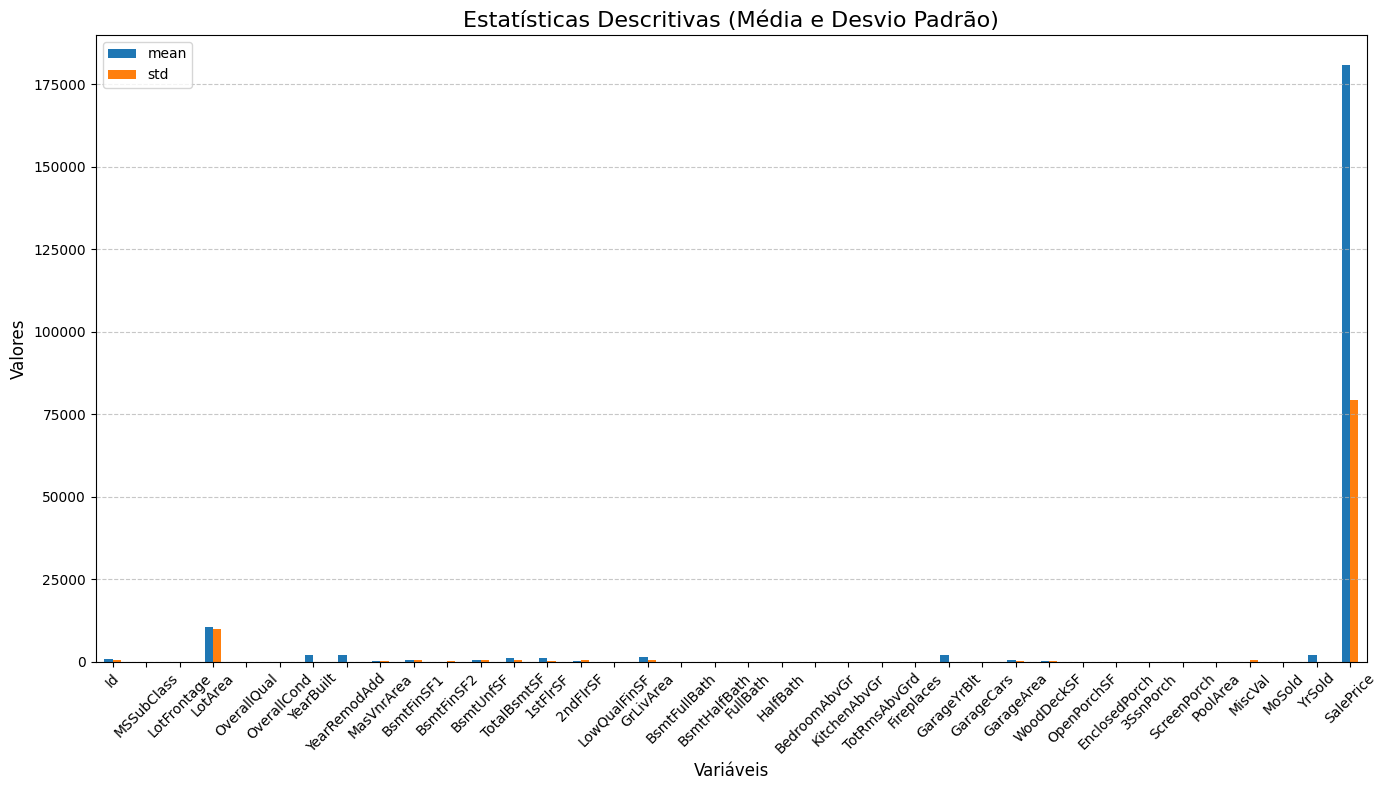

In [126]:
# Selecionar estatísticas relevantes
stats_subset = stats.loc[['mean', 'std', 'min', 'max']].T  # Transpor para fácil visualização

# Criar o gráfico
stats_subset[['mean', 'std']].plot(kind='bar', figsize=(14, 8))
plt.title('Estatísticas Descritivas (Média e Desvio Padrão)', fontsize=16)
plt.xlabel('Variáveis', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Identificar Valores Ausentes ou Nulos

A imagem apresenta uma análise das colunas do dataset que possuem valores ausentes (nulos), com o objetivo de identificar a proporção desses valores em relação ao total de registros.

- **Tabela de Resultados:**

  - **Column:** Lista as colunas do dataset que possuem valores ausentes.
  - **Missing Values:** Mostra a quantidade de valores ausentes em cada coluna.
  - **Percentage Missing:** Apresenta a porcentagem de valores ausentes em relação ao total de dados da coluna.

- **Análise Visual:**

  - As colunas são organizadas em ordem decrescente de valores ausentes, permitindo identificar rapidamente quais colunas possuem os maiores problemas de dados nulos.
  - Colunas como `PoolQC` e `MiscFeature` têm mais de 90% de valores ausentes, destacadas em vermelho, indicando maior criticidade.
  - Outras colunas, como `LotFrontage` e `Electrical`, possuem percentuais menores de valores ausentes, indicados em azul, sugerindo menor impacto.

<br>

Esta visualização ajuda a priorizar as ações de limpeza ou imputação de dados, dependendo da importância de cada coluna para o modelo ou análise subsequente.

In [127]:
# Contar valores ausentes por coluna
#print(data.isnull().sum())

# Contar valores ausentes por coluna
missing_values = data.isnull().sum()

# Criar um DataFrame para visualização
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage Missing': (missing_values.values / len(data)) * 100
})

# Filtrar colunas com valores ausentes (opcional)
missing_df = missing_df[missing_df['Missing Values'] > 0]

# Aplicar estilo à tabela
missing_styled = missing_df.style.background_gradient(subset=['Missing Values', 'Percentage Missing'], cmap='coolwarm')\
                              .format({'Percentage Missing': '{:.2f}%'}).set_caption("Valores Ausentes por Coluna")

# Exibir a tabela estilizada
missing_styled


,Column,Missing Values,Percentage Missing
3,LotFrontage,259,17.74%
6,Alley,1369,93.77%
25,MasVnrType,872,59.73%
26,MasVnrArea,8,0.55%
30,BsmtQual,37,2.53%
31,BsmtCond,37,2.53%
32,BsmtExposure,38,2.60%
33,BsmtFinType1,37,2.53%
35,BsmtFinType2,38,2.60%
42,Electrical,1,0.07%


## Gráfico de Barras do Resultado

A imagem apresenta um gráfico de barras que ilustra a quantidade de valores ausentes (nulos) em diferentes colunas do dataset. Este gráfico é baseado na análise prévia dos valores ausentes por coluna.

- **Eixo Y (Colunas):** Exibe as colunas do dataset que possuem valores ausentes.

- **Eixo X (Quantidade de Valores Ausentes):** Representa a quantidade total de valores ausentes em cada coluna.

- **Interpretação do Gráfico:**

  - Colunas como `MiscFeature` e `PoolQC` têm o maior número de valores ausentes, com barras mais longas.
  - Colunas como `LotFrontage` e `Alley` também possuem uma quantidade considerável de valores ausentes, mas inferior às anteriores.
  - Algumas colunas têm valores ausentes mínimos ou nulos, representados por barras curtas ou ausentes no gráfico.

<br>

Este tipo de visualização facilita a identificação de colunas problemáticas que requerem tratamento de dados, como imputação ou exclusão, dependendo da relevância para o modelo ou análise.

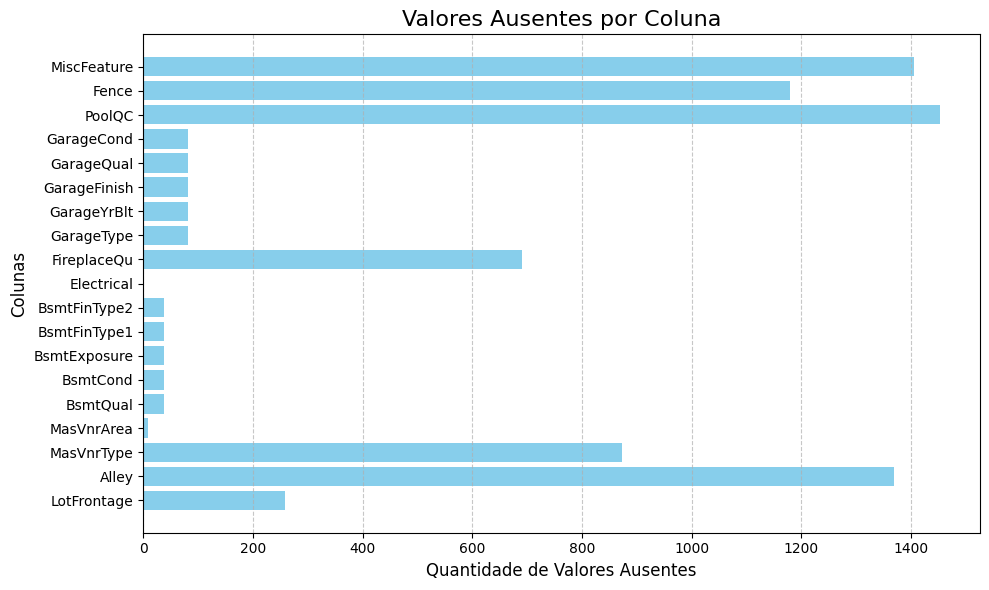

In [128]:
# Gráfico de barras para valores ausentes
plt.figure(figsize=(10, 6))
plt.barh(missing_df['Column'], missing_df['Missing Values'], color='skyblue')
plt.title('Valores Ausentes por Coluna', fontsize=16)
plt.xlabel('Quantidade de Valores Ausentes', fontsize=12)
plt.ylabel('Colunas', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Identificação de Valores Duplicados

In [129]:
# print(data.duplicated().sum())

train_data = pd.DataFrame(data)

train_data.duplicated().sum()

0

## **Tratamento** dos Dados Ausentes ou Nulos

### Remoção de Colunas com Alta Proporção de Valores Nulos

In [130]:
high_null_cols = ['MiscFeature', 'Fence', 'PoolQC', 'Alley']
data_cleaned = data.drop(columns=high_null_cols)

### Substituição de Valores em Colunas Moderadas

In [131]:
# Substituir FireplaceQu por "None"
data_cleaned['FireplaceQu'].fillna('None', inplace=True)

# Substituir LotFrontage pela mediana
data_cleaned['LotFrontage'].fillna(data_cleaned['LotFrontage'].median(), inplace=True)

# Substituir MasVnrType pelo valor mais frequente
data_cleaned['MasVnrType'].fillna(data_cleaned['MasVnrType'].mode()[0], inplace=True)

<ipython-input-131-54861aa219dc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['FireplaceQu'].fillna('None', inplace=True)
<ipython-input-131-54861aa219dc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

### Substituição dos Valores em Colunas com Baixa Proporção de Nulos

In [132]:
# Substituir variáveis categóricas relacionadas a garagem e porão por "None"
garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure']

for col in garage_cols + basement_cols:
    data_cleaned[col].fillna('None', inplace=True)

# Substituir Electrical pela moda (valor mais frequente)
data_cleaned['Electrical'].fillna(data_cleaned['Electrical'].mode()[0], inplace=True)

<ipython-input-132-3fd93f32680b>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[col].fillna('None', inplace=True)
<ipython-input-132-3fd93f32680b>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

### Remoção de Linhas com Muitos Valores Nulos

In [133]:
data_cleaned = data_cleaned.dropna(thresh=int(0.5 * data_cleaned.shape[1]))

## Visualização do Tratamento dos Valores Ausentes

## Informações Pós-Tratamento

A imagem apresenta uma tabela que mostra as informações de valores ausentes no dataset após a realização do processo de limpeza dos dados.

- **Colunas:** A tabela inclui colunas do dataset que ainda possuem valores ausentes, com as seguintes métricas:

  - **Missing Values After:** Número de valores ausentes restantes em cada coluna.
  - **Percentage Missing After:** Percentual de valores ausentes restantes em relação ao total de registros.

- **Interpretação dos Resultados:**

  - A maioria das colunas agora apresenta `0 valores ausentes`, indicando que o processo de limpeza foi eficaz para eliminar ou tratar os valores nulos.
  - As colunas `BsmtFinType2` e `GarageYrBlt` ainda possuem valores ausentes, mas em menor proporção:
    - `BsmtFinType2`: 38 valores ausentes, representando 2.60% do total.
    - `GarageYrBlt`: 81 valores ausentes, representando 5.55% do total.
- **Uso da Tabela:** Essa análise permite avaliar se o nível de valores ausentes remanescentes é aceitável ou se é necessário realizar mais tratamentos específicos nessas colunas.

In [134]:
# Verificar valores ausentes após limpeza
missing_values_after = data_cleaned.isnull().sum()

# Criar DataFrame para exibir as mudanças
missing_df_after = pd.DataFrame({
    'Column': missing_values_after.index,
    'Missing Values After': missing_values_after.values,
    'Percentage Missing After': (missing_values_after.values / len(data_cleaned)) * 100
})

# Estilizar tabela
missing_styled_after = missing_df_after.style.background_gradient(subset=['Missing Values After', 'Percentage Missing After'], cmap='coolwarm')\
                                         .format({'Percentage Missing After': '{:.2f}%'}).set_caption("Valores Ausentes Após Limpeza")

# Exibir tabela estilizada
missing_styled_after

,Column,Missing Values After,Percentage Missing After
0,Id,0,0.00%
1,MSSubClass,0,0.00%
2,MSZoning,0,0.00%
3,LotFrontage,0,0.00%
4,LotArea,0,0.00%
5,Street,0,0.00%
6,LotShape,0,0.00%
7,LandContour,0,0.00%
8,Utilities,0,0.00%
9,LotConfig,0,0.00%


### Distribuição das Colunas Importantes

A imagem apresenta gráficos de distribuição para três variáveis importantes do dataset: `SalePrice`, `LotFrontage` e `MasVnrArea`. Cada gráfico ilustra a frequência de diferentes valores para essas variáveis, proporcionando uma visão clara da sua distribuição.

### **Descrição dos gráficos:**

**1. Distribuição de SalePrice:**

  - Este gráfico mostra os preços das casas no dataset.
  - A distribuição é assimétrica à direita, indicando que a maioria das casas tem preços relativamente baixos, com algumas casas de preço mais elevado como outliers.

**2. Distribuição de LotFrontage:**

  - Representa a largura frontal dos lotes em pés lineares.
  - A maioria dos valores concentra-se em torno de 50 a 100 pés, com poucos lotes apresentando larguras muito maiores.

**3. Distribuição de MasVnrArea:**

  - Refere-se à área de revestimento em pedra ou tijolo das casas.
  - A maior parte das casas não possui revestimento significativo, com a maioria dos valores concentrados próximos de 0.

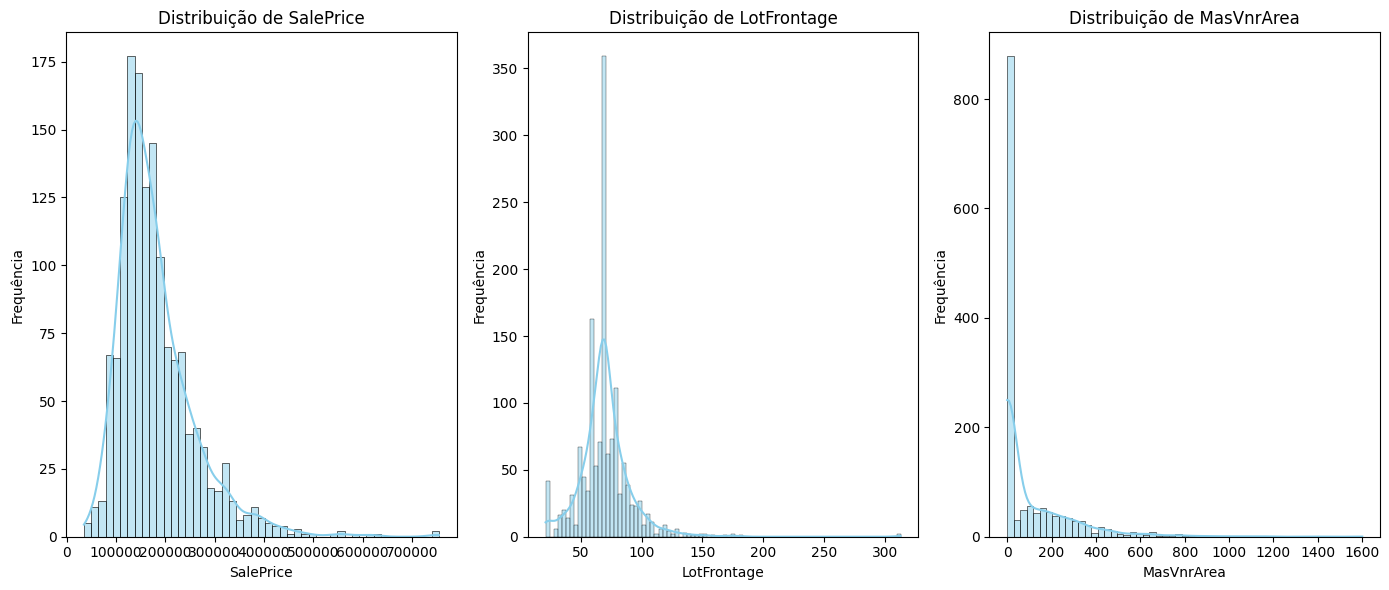

In [135]:
# Plotar a distribuição de variáveis importantes
columns_to_plot = ['SalePrice', 'LotFrontage', 'MasVnrArea']  # Exemplo de colunas importantes
plt.figure(figsize=(14, 6))

for i, col in enumerate(columns_to_plot):
    plt.subplot(1, len(columns_to_plot), i + 1)
    sns.histplot(data_cleaned[col], kde=True, color='skyblue')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### Quantidade de Valores Não Nulos por Coluna

Um gráfico de barras que representa a **quantidade de valores não nulos** presentes em cada coluna do dataset após a limpeza.

### **Descrição:**
**1. Eixo X (Colunas):**

  - Cada barra no gráfico corresponde a uma coluna do dataset, identificada pelo nome.

**2. Eixo Y (Quantidade):**

  - Representa a quantidade de valores não nulos existentes em cada coluna.

**3. Informações do Gráfico:**

  - As colunas estão organizadas de forma decrescente com base na quantidade de valores não nulos.
  - A maior parte das colunas contém valores não nulos para quase todas as amostras, com algumas poucas colunas apresentando uma quantidade reduzida, indicando a existência de valores ausentes.

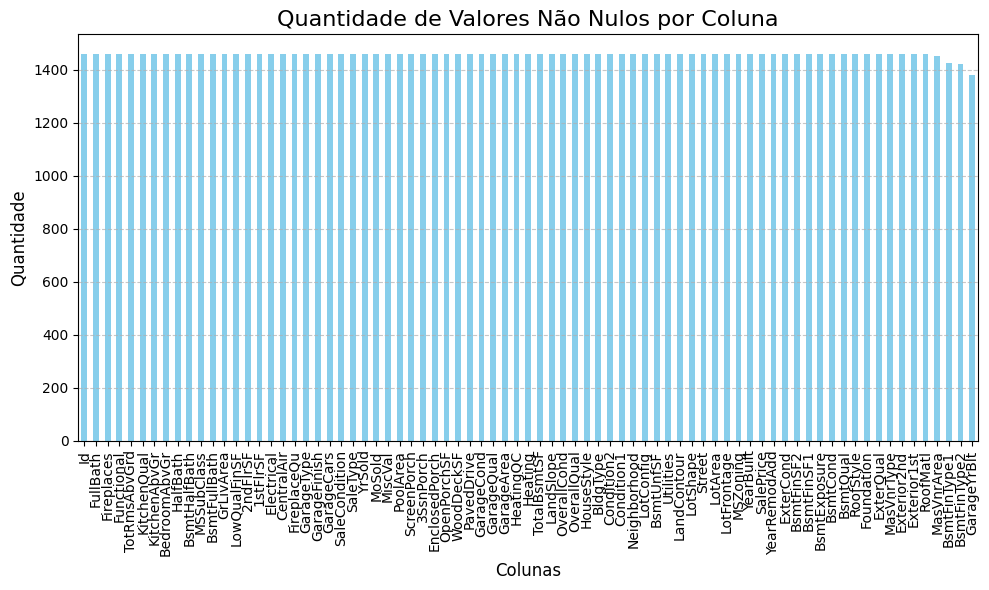

In [136]:
# Plotar quantidade de valores não nulos por coluna
non_null_counts = data_cleaned.notnull().sum()
non_null_counts = non_null_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
non_null_counts.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Valores Não Nulos por Coluna', fontsize=16)
plt.xlabel('Colunas', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Distribuição da variável alvo (SalePrice)

Um gráfico de distribuição da variável-alvo "`SalePrice`", que representa os preços das casas no dataset.

### **Descrição:**
**1. Eixo X (SalePrice):**

  - Exibe os valores do preço das casas, variando de aproximadamente 0 até valores superiores a 700.000.

**2. Eixo Y (Count):**

  - Indica a quantidade de casas em cada faixa de preço, representada pelas barras.

**3. Curva de Densidade (KDE):**

  - A linha azul sobreposta ao histograma mostra a distribuição suavizada dos preços, indicando a tendência geral dos dados.

**4. Distribuição Observada:**

  - A maior concentração de preços está em torno de 100.000 a 200.000, com a frequência decrescendo gradualmente à medida que os preços aumentam.
  - A cauda longa à direita sugere que existem algumas casas com preços muito altos, caracterizando uma distribuição assimétrica positiva.

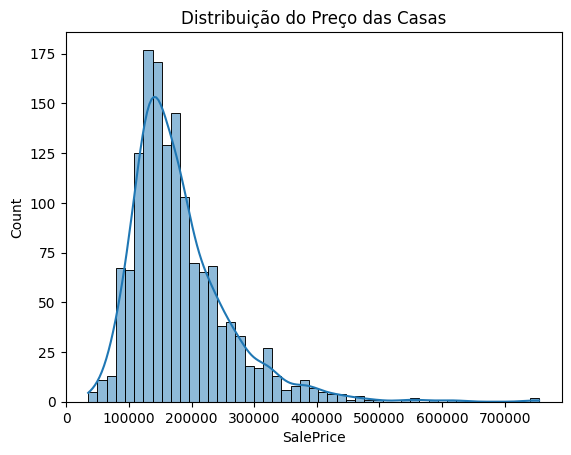

In [137]:
# Distribuição do preço das casas
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribuição do Preço das Casas')
plt.show()

## Implementação de Categorias

### **Descrição:**
**1. Criação de Categorias:**

- A variável `SalePrice` foi categorizada em três grupos:
  - **"`Barato`":** Preços até 100.000.
  - **"`Acessível`":** Preços entre 100.000 e 400.000.
  - **"`Caro`":** Preços acima de 400.000.
- Esses intervalos ajudam a simplificar a análise ao transformar valores numéricos em categorias mais compreensíveis.

**2. Visualização das Categorias:**

- Uma tabela estilizada mostra as primeiras 20 linhas do dataset com as novas categorias.
- Observa-se que a maior parte das casas está na categoria "`Acessível`", com algumas classificadas como "`Barato`". A categoria "`Caro`" não aparece nas linhas exibidas.

**3. Filtragem de Dados:**

- Embora não esteja exibida na tabela, foi realizada uma filtragem para selecionar apenas as casas da categoria "`Caro`".
- A tabela estilizada permite destacar visualmente os valores em vermelho para essas casas.

In [138]:
# Criar categorias de preço no dataset
data_cleaned['PriceCategory'] = pd.cut(
    data_cleaned['SalePrice'],
    bins=[0, 100000, 400000, float('inf')],  # Intervalos: <=100k, 100k-400k, >400k
    labels=['Barato', 'Acessível', 'Caro']       # Nomes das categorias
)

# Verificar as categorias criadas
# Criar uma tabela estilizada para visualizar as categorias
styled_table = data_cleaned[['SalePrice', 'PriceCategory']].head(20)  # Visualizar as primeiras 20 linhas
styled_table.style.background_gradient(subset=['SalePrice'], cmap='coolwarm')\
            .set_caption("Primeiras 10 Linhas com Categorias de Preço")

# Filtrar os registros onde PriceCategory é "Caro"
#expensive_houses = data_cleaned[data_cleaned['PriceCategory'] == 'Caro']

# Exibir as primeiras linhas da tabela filtrada
#expensive_houses_styled = expensive_houses[['SalePrice', 'PriceCategory']].head(10).style.background_gradient(
#    subset=['SalePrice'], cmap='Reds'
#).set_caption("Casas com Categoria de Preço: Caro")

# Exibir a tabela estilizada
#expensive_houses_styled


,SalePrice,PriceCategory
0,208500,Acessível
1,181500,Acessível
2,223500,Acessível
3,140000,Acessível
4,250000,Acessível
5,143000,Acessível
6,307000,Acessível
7,200000,Acessível
8,129900,Acessível
9,118000,Acessível


## Identificar correlações iniciais entre variáveis

**1. Variáveis com Maior Correlação Positiva**

- `OverallQual` (0.79):
  - A qualidade geral do material e acabamento da casa tem a maior correlação com o preço de venda (`SalePrice`).
  - Isso faz sentido, pois casas com melhor qualidade geralmente custam mais.

- `GrLivArea` (0.71):
  - A área total acima do solo é altamente correlacionada com o preço de venda, pois mais espaço útil geralmente aumenta o valor.

- `GarageCars` (0.64) e `GarageArea` (0.62):
  - O número de vagas na garagem e a área da garagem são importantes para o preço.

- `TotalBsmtSF` (0.61):
  - A área total do porão também é um fator significativo.

<br><br>

**2. Variáveis com Correlação Negativa**
- `KitchenAbvGr` (-0.14):
  - Um número maior de cozinhas acima do nível do solo tem uma correlação negativa leve com o preço de venda.

- `EnclosedPorch` (-0.13):
  - Varandas fechadas parecem estar negativamente correlacionadas ao preço, embora de forma sutil.

- `OverallCond` (-0.08):
  - A condição geral da casa tem uma correlação negativa, sugerindo que valores altos para essa variável podem não indicar boa qualidade.

<br><br>

**3. Variáveis Pouco Relevantes**
- Variáveis como `MiscVal`, `Id`, e `YrSold` têm correlação muito baixa ou insignificante com `SalePrice`.
  - Essas podem ser descartadas para fins de modelagem, pois não adicionam muito valor preditivo.

<br>

Com base nestes resultados, podemos:
- Selecionar Variáveis Importantes:
  - Usar as variáveis mais correlacionadas com `SalePrice` para criar modelos mais eficientes.
    - Exemplo: `OverallQual`, `GrLivArea`, `GarageCars`, e `TotalBsmtSF`.


## Tabela de Correlação

In [139]:
# Matriz de correlação

# Selecionar apenas as colunas numéricas
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Criar a matriz de correlação
corr_matrix = numeric_data.corr()

# Ordenar a correlação e criar um DataFrame para exibição
correlation_table = corr_matrix['SalePrice'].sort_values(ascending=False).reset_index()
correlation_table.columns = ['Feature', 'Correlation with SalePrice']

# Exibir tabela no Colab com formatação
correlation_table.style.background_gradient(cmap='coolwarm').format(precision=2)

,Feature,Correlation with SalePrice
0,SalePrice,1.00
1,OverallQual,0.79
2,GrLivArea,0.71
3,GarageCars,0.64
4,GarageArea,0.62
5,TotalBsmtSF,0.61
6,1stFlrSF,0.61
7,FullBath,0.56
8,TotRmsAbvGrd,0.53
9,YearBuilt,0.52


## Matriz de Correlação

### **Descrição:**
**1. Seleção de Colunas Numéricas:**

- Apenas as colunas numéricas do dataset foram selecionadas para calcular a matriz de correlação. Isso exclui variáveis categóricas ou não numéricas, garantindo um cálculo coerente.

**2. Filtragem de Variáveis Relevantes:**

- A matriz de correlação completa foi calculada e, em seguida, filtrada para incluir apenas as variáveis com uma correlação absoluta maior que 0.5 com `SalePrice`.
- Isso permite focar nas variáveis que possuem maior impacto nos preços das casas, como `OverallQual` (qualidade geral), `GrLivArea` (área habitável acima do solo) e `GarageCars` (número de carros na garagem).

**3. Visualização com Heatmap:**

- O heatmap mostra graficamente os valores de correlação entre as variáveis selecionadas, utilizando cores para representar a força da correlação:
  - Tons mais vermelhos indicam uma correlação positiva forte.
  - Tons mais azuis indicam correlação mais fraca ou ausente.
- A diagonal sempre exibe correlação máxima (1.00), pois são as variáveis correlacionadas consigo mesmas.

**4. Interpretação:**

- Variáveis como `OverallQual` e `GrLivArea` possuem altas correlações positivas com SalePrice, indicando que melhorias na qualidade geral ou aumento da área habitável têm forte impacto no preço.
- `GarageCars` e `GarageArea` também têm correlações significativas, sugerindo que o tamanho e a capacidade da garagem influenciam no valor da propriedade.

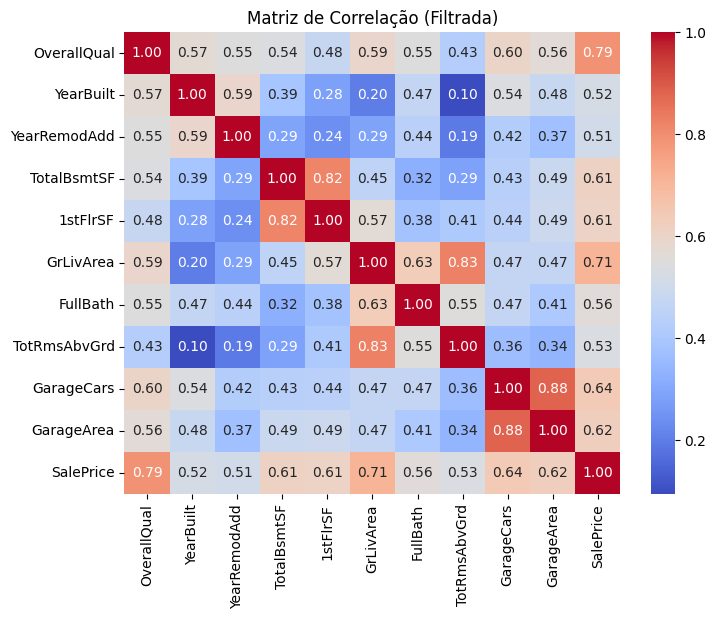

In [140]:
# Selecionar apenas as colunas numéricas
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Criar a matriz de correlação
corr_matrix = numeric_data.corr()

# Filtrar as variáveis com alta correlação com SalePrice
high_corr_vars = corr_matrix['SalePrice'][abs(corr_matrix['SalePrice']) > 0.5].index

# Criar uma nova matriz de correlação apenas com essas variáveis
filtered_corr_matrix = corr_matrix.loc[high_corr_vars, high_corr_vars]

# Configurar o tamanho do gráfico
plt.figure(figsize=(8, 6))

# Gerar o heatmap
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Adicionar título
plt.title("Matriz de Correlação (Filtrada)")

# Mostrar o gráfico
plt.show()

## Gráfico de Barras da Correlação

### **Descrição:**

**1. Ordenação das Variáveis:**

- As características do dataset foram ordenadas com base nos valores de correlação com `SalePrice`, em ordem decrescente. A variável `SalePrice` foi excluída do gráfico para evitar redundância.

**2. Visualização do Gráfico:**

- O gráfico ilustra os coeficientes de correlação de cada característica em relação ao preço das casas.
- Características com maior correlação estão listadas no topo, enquanto as de menor correlação estão na parte inferior.

**3. Interpretação:**

- **Alta Correlação Positiva:**
  - `OverallQual` (qualidade geral da casa) e `GrLivArea` (área habitável acima do solo) têm os coeficientes mais altos, indicando que essas variáveis têm um impacto significativo e direto no preço.
  - Outras variáveis como `GarageCars` (capacidade da garagem) e `GarageArea` (área da garagem) também estão fortemente correlacionadas.

- **Baixa ou Nenhuma Correlação:**
  - Variáveis como `KitchenAbvGr` (número de cozinhas acima do solo) e `EnclosedPorch` (varanda fechada) possuem coeficientes muito próximos de zero, sugerindo pouca influência sobre o preço.

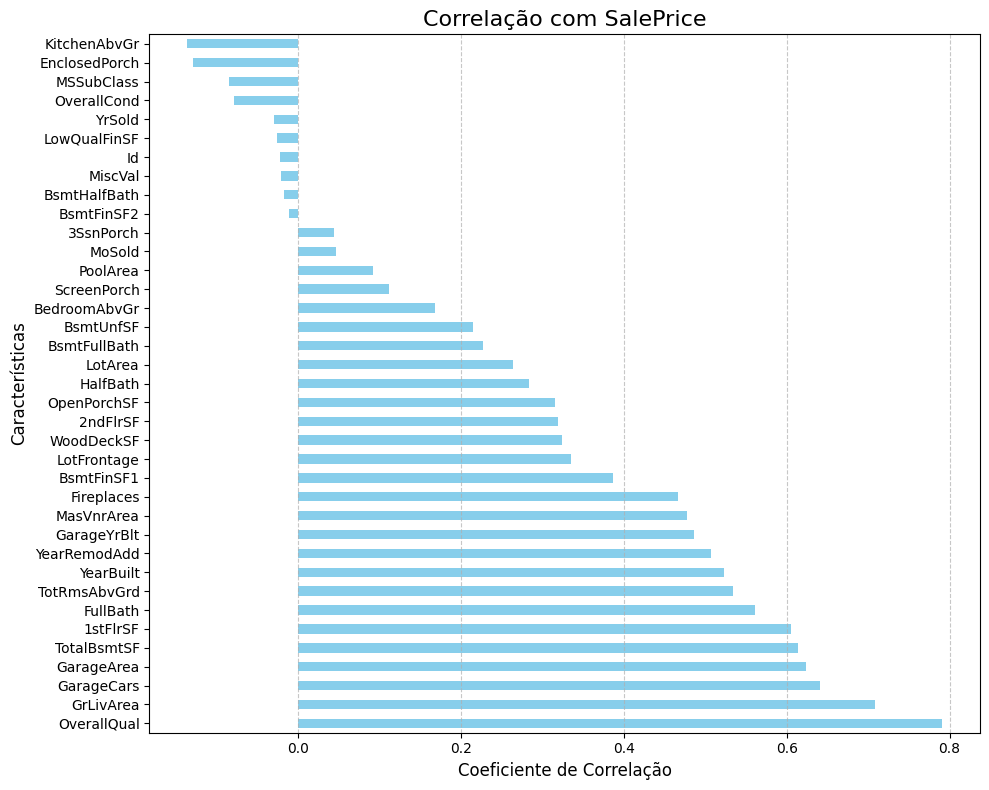

In [141]:
# Ordenar os valores para o gráfico
correlation_sorted = corr_matrix['SalePrice'].sort_values(ascending=False)

# Criar o gráfico
plt.figure(figsize=(10, 8))
correlation_sorted.drop('SalePrice').plot(kind='barh', color='skyblue')  # Excluir SalePrice da lista
plt.title('Correlação com SalePrice', fontsize=16)
plt.xlabel('Coeficiente de Correlação', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Plotar gráficos de dispersão

Visualização de Relações entre Variáveis e o Preço de Venda (SalePrice)

Objetivo:
Este trecho de código cria uma visualização para analisar a relação entre as variáveis mais correlacionadas com o preço de venda das casas (`SalePrice`), conforme identificado na análise de correlação anterior.

Descrição dos Gráficos:
1. **OverallQual vs SalePrice**:
   - Representa a qualidade geral da casa em relação ao preço de venda.
   - Espera-se observar que casas de maior qualidade (`OverallQual`) têm preços mais altos.

2. **GrLivArea vs SalePrice**:
   - Exibe a relação entre a área total acima do solo (`GrLivArea`) e o preço de venda.
   - Casas maiores geralmente têm preços mais altos, então uma tendência positiva é esperada.

3. **GarageCars vs SalePrice**:
   - Mostra como o número de vagas na garagem (`GarageCars`) afeta o preço.
   - Garagens maiores ou com mais vagas podem aumentar o preço das casas.

4. **TotalBsmtSF vs SalePrice**:
   - Analisa a influência da área total do porão (`TotalBsmtSF`) no preço.
   - Casas com maior área de porão tendem a ter preços mais altos.

Configuração:
- Os gráficos são organizados em uma grade de 2 linhas por 2 colunas para facilitar a comparação visual.
- Cada gráfico tem um título descritivo para identificar rapidamente a variável sendo analisada.

Conclusão:
Esta visualização ajuda a identificar padrões e tendências entre as variáveis e `SalePrice`, fornecendo insights importantes para a modelagem preditiva.

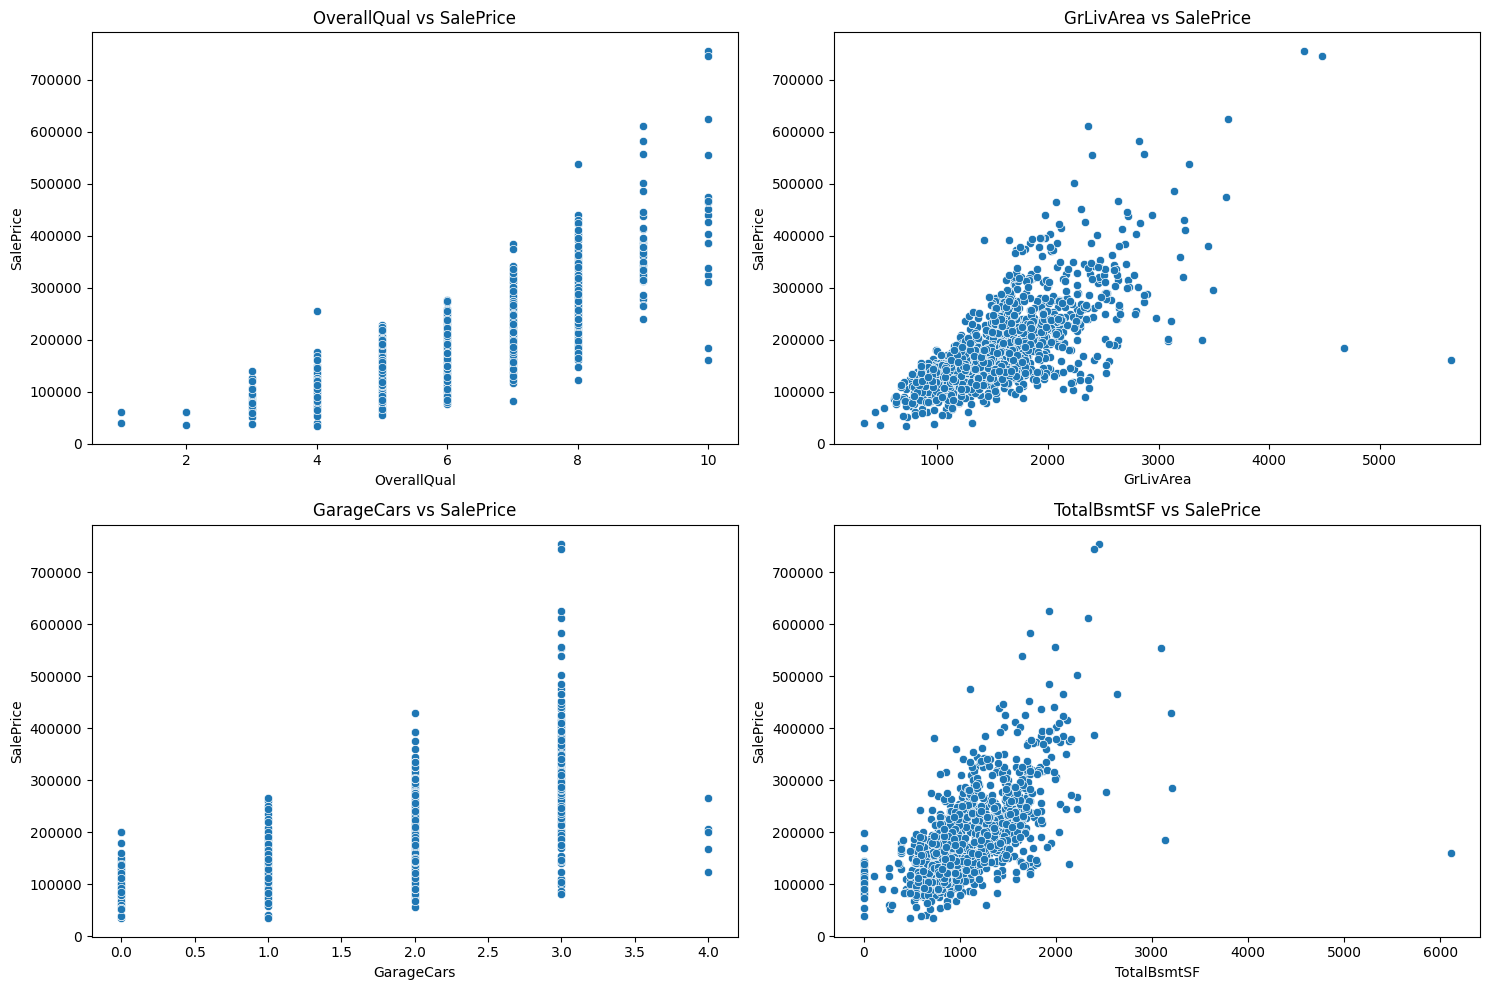

In [142]:
# Configurar o tamanho da figura
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 linhas, 2 colunas

# Gráfico 1: OverallQual vs SalePrice
sns.scatterplot(ax=axes[0, 0], x=data['OverallQual'], y=data['SalePrice'])
axes[0, 0].set_title('OverallQual vs SalePrice')

# Gráfico 2: GrLivArea vs SalePrice
sns.scatterplot(ax=axes[0, 1], x=data['GrLivArea'], y=data['SalePrice'])
axes[0, 1].set_title('GrLivArea vs SalePrice')

# Gráfico 3: GarageCars vs SalePrice
sns.scatterplot(ax=axes[1, 0], x=data['GarageCars'], y=data['SalePrice'])
axes[1, 0].set_title('GarageCars vs SalePrice')

# Gráfico 4: TotalBsmtSF vs SalePrice
sns.scatterplot(ax=axes[1, 1], x=data['TotalBsmtSF'], y=data['SalePrice'])
axes[1, 1].set_title('TotalBsmtSF vs SalePrice')

# Ajustar espaçamento entre gráficos
plt.tight_layout()
plt.show()

## Análise de Perfis das Variáveis Relevantes com Diagramas de Caixa

### **Explicação:**
**1. Diagrama de Caixa (Boxplot):**
  - A linha central dentro da caixa representa a mediana (valor central dos dados).
  - A parte superior e inferior da caixa representam o primeiro e terceiro quartis (Q1 e Q3), ou seja, os valores dentro do intervalo interquartil (IQR).
  - Os `bigodes` se estendem até os valores que não são considerados outliers (1,5 vezes o IQR para cima ou para baixo).

<br>

**2. Outliers:**
  - Pontos fora dos bigodes (extremos do diagrama) são considerados outliers.
  - Eles indicam valores que estão significativamente acima ou abaixo do intervalo esperado.

<br>

### **O que significa para o dataset utilizado:**
  **- Interpretação:**
  - Os valores representados por esses pontos são mais extremos em comparação com o restante dos dados.
  - Por exemplo, no gráfico de `SalePrice`, há casas com preços muito superiores à maioria, que são representadas como outliers.
  - Em `TotalBsmtSF`, existem propriedades com áreas de porão muito maiores do que a média.

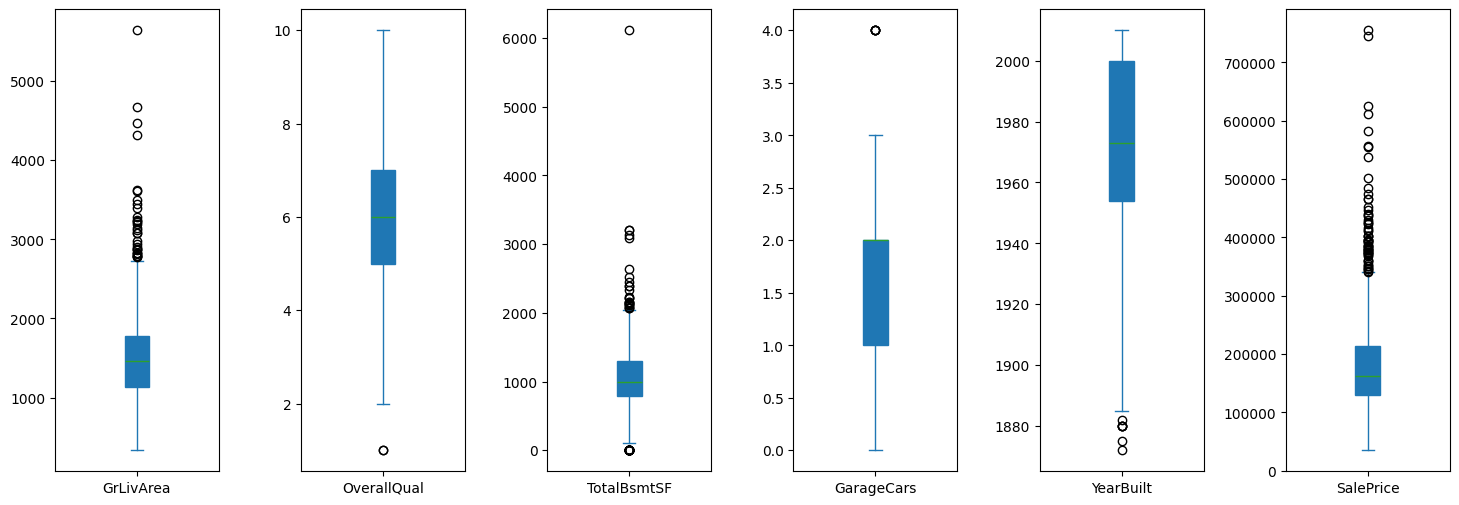

In [143]:
# Selecionar as colunas mais relevantes do seu dataset
columns_to_plot = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'YearBuilt', 'SalePrice']

# Criar os diagramas de caixa
data_cleaned[columns_to_plot].plot(kind='box', subplots=True, layout=(1, len(columns_to_plot)),
                                   sharex=False, sharey=False, figsize=(18, 6), patch_artist=True)

# Ajustar os espaços entre os gráficos
plt.subplots_adjust(wspace=0.5)

# Exibir os gráficos
plt.show()

### Análise do Resultado

Os diagramas de caixa revelam importantes características das variáveis analisadas no dataset.

- **`GrLivArea`:** A maioria das casas possui entre 1000 e 2500 pés quadrados de área habitável, com alguns outliers acima de 4000, indicando propriedades maiores.

<br>

- **`OverallQual`:** A qualidade geral das casas varia entre 5 e 7, com poucas classificações abaixo de 3 ou acima de 9, indicando raridade em extremos de qualidade.

<br>

- **`TotalBsmtSF`:** A área total do porão está concentrada em torno de 1000 pés quadrados, com outliers acima de 3000.
GarageCars: A maioria das garagens acomoda 1 a 2 carros, com alguns outliers com capacidade para mais de 3 carros.

<br>

- **`YearBuilt`:** As construções predominam entre 1950 e 2000, com raras propriedades mais antigas datando antes de 1900.

<br>

- **`SalePrice`:** Os preços de venda estão concentrados entre 100.000 e 300.000 unidades, com outliers acima de 500.000 indicando casas de maior valor.

## Impacto das Categorias no Dataset

### Peso de cada Categoria

### **Descrição:**

**1. Contagem de Ocorrências:**

- A tabela exibe a quantidade de casas que pertencem a cada uma das três categorias: `Acessível`, `Barato` e `Caro`.

**2. Peso em Percentagem:**

- A tabela também mostra o peso percentual de cada categoria em relação ao total do dataset.
- Por exemplo, 90% das casas estão na categoria `Acessível`, enquanto apenas 2% estão na categoria `Caro`.

**3. Resumo e Organização:**

- Os dados são apresentados de forma clara em uma tabela formatada, incluindo o número absoluto de ocorrências (`Quantidade`) e o peso relativo (`Peso`).
- Isso facilita a visualização da predominância das categorias no dataset.

**4. Interpretação:**

- O maior número de casas pertence à categoria `Acessível`, indicando que a maior parte dos preços no dataset está concentrada nessa faixa.
- Já as categorias `Barato` e `Caro` representam uma pequena parte do conjunto de dados, sugerindo que são extremos menos comuns.

In [144]:
# Calcular a quantidade de ocorrências de cada categoria
category_counts = data_cleaned['PriceCategory'].value_counts()

# Calcular os pesos em porcentagem, arredondados sem casas decimais
category_weights = data_cleaned['PriceCategory'].value_counts(normalize=True) * 100
category_weights = category_weights.round(0).astype(int)

# Criar um DataFrame com as informações de categorias
category_summary = pd.DataFrame({
    'Categoria': category_counts.index,
    'Quantidade': category_counts.values,
    'Peso': category_weights.values
})

# Estilizar a tabela para exibição
category_summary_styled = category_summary.style.format({
    'Peso': '{:.0f}%'  # Formatar o peso com o símbolo de porcentagem
}).set_caption("Resumo das Categorias")

# Exibir a tabela estilizada
category_summary_styled

,Categoria,Quantidade,Peso
0,Acessível,1309,90%
1,Barato,123,8%
2,Caro,28,2%


## Equilíbrio das Categorias

### **Descrição:**

**1. Identificação das Categorias:**

- Foi realizada uma separação das casas classificadas como Acessível (maioria no dataset) das demais categorias (Barato e Caro).

**2. Redução de Dados para Balanceamento:**

- A categoria Acessível, que era predominante, foi reduzida para incluir apenas uma fração (1%) de seus registros, equilibrando sua proporção com as outras categorias.

**3. Combinação dos Dados:**

- Após a redução, os dados das três categorias foram combinados em um novo dataset balanceado.

**4. Resumo das Categorias Balanceadas:**

- A tabela resultante exibe a quantidade ajustada de registros para cada categoria:
  - `Barato`: 123 registros (75% do total).
  - `Caro`: 28 registros (17% do total).
  - `Acessível`: 13 registros (8% do total).

In [145]:
medium_class = data_cleaned[data_cleaned['PriceCategory'] == 'Acessível']
other_classes = data_cleaned[data_cleaned['PriceCategory'] != 'Acessível']

medium_class_reduced = medium_class.sample(frac=0.01, random_state=27)

balanced_data = pd.concat([medium_class_reduced, other_classes])

# Calcular as quantidades e os pesos das categorias no dataset balanceado
balanced_counts_new = balanced_data['PriceCategory'].value_counts()
balanced_weights_new = balanced_data['PriceCategory'].value_counts(normalize=True) * 100

# Criar um DataFrame para exibir as categorias balanceadas
balanced_summary_new = pd.DataFrame({
    'Categoria': balanced_counts_new.index,
    'Quantidade': balanced_counts_new.values,
    'Peso': balanced_weights_new.round(0).astype(int)  # Arredondar os pesos para inteiros
}).reset_index(drop=True)

# Estilizar a tabela para exibição
balanced_summary_new_styled = balanced_summary_new.style.format({
    'Peso': '{:.0f}%'  # Formatar o peso com o símbolo de percentagem
}).set_caption("Resumo das Categorias Após Equilíbrio")

# Exibir a tabela estilizada
balanced_summary_new_styled

,Categoria,Quantidade,Peso
0,Barato,123,75%
1,Caro,28,17%
2,Acessível,13,8%


# Implementação de Métodos

## Método **DecisionTreeClassifier**

### Construção do Modelo do Método **DTC**

**1. Preparação dos Dados:** O dataset balanceado foi dividido em variáveis independentes (`X`) e a variável alvo (`PriceCategory`). As variáveis categóricas foram codificadas com one-hot encoding.

**2. Divisão dos Dados:** O dataset foi dividido em treino (`80%`) e teste `(`20%`), com **random_state=42** para reprodutibilidade.

**3. Criação e Treino do Modelo:** Um modelo de árvore de decisão foi configurado com `max_depth=5` (profundidade máxima), `min_samples_split=2` (mínimo de amostras por nó) e `random_state=25` para consistência. O modelo foi treinado com os dados de treino.

In [146]:
# Separar as variáveis independentes (X) e a variável alvo (y)
X = balanced_data.drop(columns=['PriceCategory'])  # Defina X aqui
y = balanced_data['PriceCategory']

# Codificar variáveis categóricas em X usando one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=25)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=25)

## Visualização da Árvore de Decisão

Visualização da árvore de decisão gerada pelo modelo **DecisionTreeClassifier**. A árvore foi configurada para exibir os detalhes de divisão em cada nó:

**1. Nós e Divisões:**

- Cada nó apresenta a regra de decisão (e.g., `SalePrice <= 101800.0`), o índice de Gini (indicando a pureza do nó), o número de amostras que passaram por ele, e a distribuição de classes no nó.
- O nó final (folhas) indica a classe prevista para os dados.

**2. Estrutura da Árvore:**

- O primeiro nó divide as amostras com base no preço de venda (SalePrice).
- Nós sucessivos refinaram as divisões para separar as categorias de preço (`Barato`, `Acessível`, `Caro`).

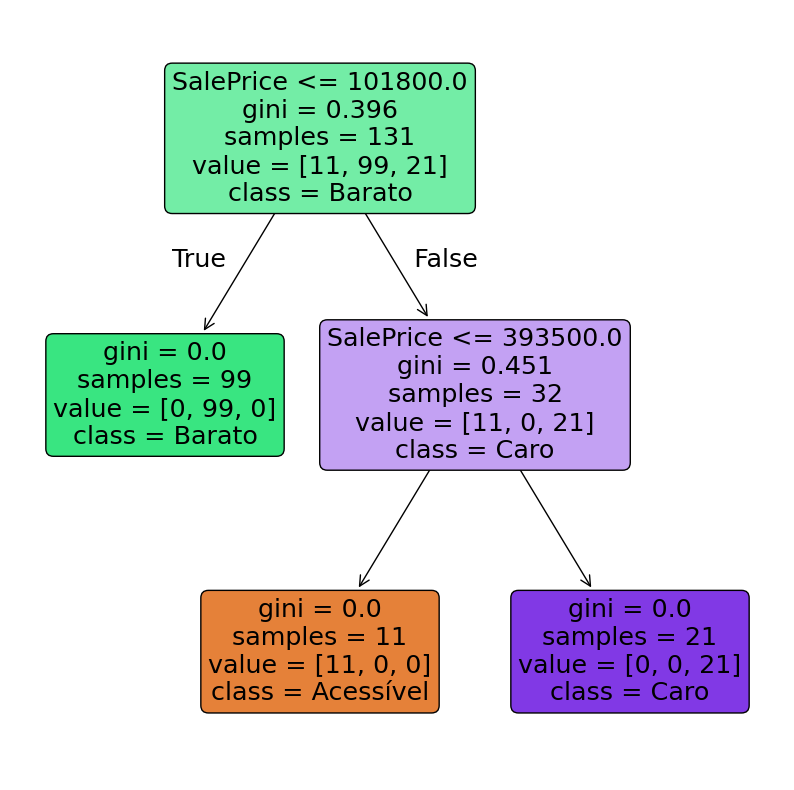

'decision_tree.pdf'

In [147]:
# Certifique-se de importar a biblioteca Graphviz corretamente
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizar a árvore de decisão com matplotlib
plt.figure(figsize=(10, 10))  # Aumentar o tamanho para visualizar mais detalhes
plot_tree(
    model,  # O modelo treinado
    feature_names=X_encoded.columns,  # Nomes das variáveis de entrada
    class_names=model.classes_,  # Classes alvo
    filled=True,  # Preencher os nós com cores
    rounded=True  # Canto arredondado nos nós
)
plt.show()

# Gerar a árvore de decisão usando Graphviz
dot_data = export_graphviz(
    model,  # O modelo treinado
    out_file=None,  # Não salvar em arquivo, apenas gerar o conteúdo
    feature_names=X_encoded.columns,  # Nomes das variáveis de entrada
    class_names=model.classes_,  # Classes alvo
    filled=True,  # Preencher os nós com cores
    rounded=True,  # Canto arredondado nos nós
    special_characters=True  # Permitir caracteres especiais
)

# Criar o gráfico usando Graphviz e salvar como PNG
graph = Source(dot_data)  # Criar a fonte do gráfico
graph.render("decision_tree", format="png", cleanup=True)  # Salvar o gráfico como PNG e limpar arquivos temporários
graph.view()  # Abrir a visualização do gráfico


## Avaliação do modelo **DecisionTreeClassifier**

 Os melhores parâmetros encontrados foram:

- **max_depth: `2`:** A profundidade da árvore foi limitada a 2 níveis, o que sugere que o modelo conseguiu capturar os padrões principais do dataset sem se tornar excessivamente complexo. Isso é útil para evitar overfitting, mas pode indicar que os dados possuem relações diretas simples entre as variáveis independentes e a variável alvo.

- **min_samples_leaf: `1`:** Este parâmetro permite que folhas individuais contenham apenas uma amostra. Isso pode ser aceitável se os dados forem bem distribuídos e o objetivo for maximizar a precisão nas previsões de categorias raras.

- **min_samples_split: `2`:** O modelo divide os nós internos em subnós se houver pelo menos 2 amostras. Essa configuração básica é adequada para garantir que cada divisão seja avaliada, mesmo com poucos dados em uma amostra.

- **Melhor Accuracy: `0.9846 (98.46%)`:** Este resultado mostra que o modelo é altamente preciso ao prever os dados do conjunto de treino/teste. No entanto, é importante verificar se esta alta precisão não é causada por overfitting ao conjunto de treino.

Accuracy: 1.00
              precision    recall  f1-score   support

   Acessível       1.00      1.00      1.00         2
      Barato       1.00      1.00      1.00        24
        Caro       1.00      1.00      1.00         7

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



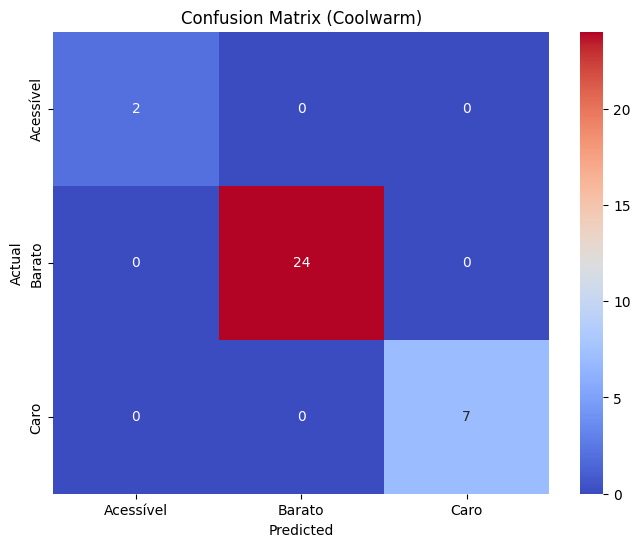

In [148]:
# Garantir que os nomes das colunas são consistentes
if isinstance(X_train, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=X_train.columns)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Exibir o relatório de classificação
print(classification_report(y_test, y_pred))

# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='coolwarm',
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test)
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Coolwarm)')
plt.show()

## Procura pelos Melhores Parâmetros

Processo de busca pelos melhores parâmetros para um modelo de árvore de decisão utilizando o método `GridSearchCV`. Esse processo ajusta o modelo a diferentes combinações de parâmetros fornecidos, avaliando a performance em termos de accuracy com validação cruzada (5 folds).

No final, o resultado exibe:

- **Melhores Parâmetros:** `{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}`.
- **Melhor Accuracy:** `0.9840`, indicando que o modelo obteve um desempenho muito alto com essa configuração.

In [149]:
# Definir os intervalos de parâmetros para o GridSearch
parametros = {
    'max_depth': range(2, 11),
    'min_samples_split': range(2, 6),
    'min_samples_leaf': [1, 3, 5, 7, 9]
}

# Instanciar o modelo DecisionTreeClassifier
arvore_decisao = DecisionTreeClassifier(random_state=42)

# Configurar o GridSearchCV
busca_parametros = GridSearchCV(
    estimator=arvore_decisao,
    param_grid=parametros,
    scoring='accuracy',
    cv=5,
    verbose=1
)

# Ajustar o GridSearch aos dados de treino
busca_parametros.fit(X_train, y_train)

# Obter os melhores Parameters e a melhor Accuracy
melhores_parametros = busca_parametros.best_params_
melhor_acuracia = busca_parametros.best_score_

# Exibir os resultados
print(f"Best Parameters: {melhores_parametros}")
print(f"Best Accuracy: {melhor_acuracia:.4f}")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Parameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.9846


<br><br><br>

## Método **K-Nearest Neighbors**

### Construção do Modelo do Método **K-NN**

Utilizado o modelo `Hold-Out`

O modelo Hold-Out divide o dataset em dois subconjuntos:

1. Conjunto de treino (`X_train`, `y_train`): Utilizado para treinar o modelo.
2. Conjunto de teste (`X_test`, `y_test`): Utilizado para avaliar o desempenho do modelo treinado em dados não vistos.

`X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)`

**Detalhes:**
- O parâmetro `test_size=0.25` define que **25% dos dados** serão separados para o conjunto de teste, enquanto **75% serão usados para treino**.
- `random_state=42` garante que a divisão seja reproduzível.


In [150]:
# Separar os dados em variáveis independentes (X) e dependente (y)
X = balanced_data.drop(columns=['PriceCategory'])
y = balanced_data['PriceCategory']

# Converter colunas categóricas em numéricas usando get_dummies
X_encoded = pd.get_dummies(X, drop_first=True)

# Dividir os dados em treino e teste (hold-out)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

# Lidar com valores ausentes
imputer = SimpleImputer(strategy='mean')  # Ou use 'median' ou 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Escalar os dados usando MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instanciar o modelo K-Nearest Neighbors
model_knn = KNeighborsClassifier(n_neighbors=6, metric='manhattan', weights='distance')

# Treinar o modelo
model_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance')

## Implementação e Visualização do Método **K-NN**

### **Explicação do Gráfico:**
O gráfico acima representa as distâncias calculadas entre cada ponto de teste e os seus vizinhos mais próximos no modelo KNN. Cada linha colorida corresponde à distância para um vizinho específico (1º, 2º, etc.), enquanto o eixo x exibe o índice dos pontos de teste. As linhas horizontais em azul claro representam valores de referência para facilitar a identificação de padrões ou discrepâncias nos dados.

### **Análise:**

**1. Distribuição das Distâncias:**
- É possível observar que as distâncias variam significativamente entre os pontos de teste. Isso pode indicar a presença de pontos de dados que estão mais afastados da maioria dos outros (outliers) ou que existem diferenças substanciais nas densidades das regiões do espaço de atributos.

<br>

**2. Ruído nos Dados:**
- Flutuações consideráveis nas distâncias podem indicar ruído nos dados ou regiões de baixa densidade no espaço de atributos. Isso é algo a se monitorar, pois pode afetar a precisão do modelo KNN.

<br>

**3. Regularidade:**
- Em algumas regiões do gráfico, as distâncias são mais consistentes, indicando que os pontos de teste estão em regiões de alta densidade, próximas aos seus vizinhos. Isso é desejável em muitas aplicações, pois reflete maior confiabilidade no modelo.

<br>

**4. Impacto do Número de Vizinhos:**
- O uso de 5 vizinhos (definido em `n_neighbors=5`) permite capturar uma visão geral equilibrada entre vizinhos próximos e um conjunto de vizinhos um pouco mais distantes. Se as distâncias para vizinhos mais distantes (4º e 5º) forem significativamente maiores, isso pode ser um indicativo de que o número de vizinhos ideal deve ser ajustado.

<br>

**5. Interpretação Prática:**
- As regiões onde as distâncias aumentam rapidamente (picos) podem ser analisadas em detalhe. Estes pontos podem ser candidatos para verificação manual ou reavaliação do modelo, dependendo da aplicação.

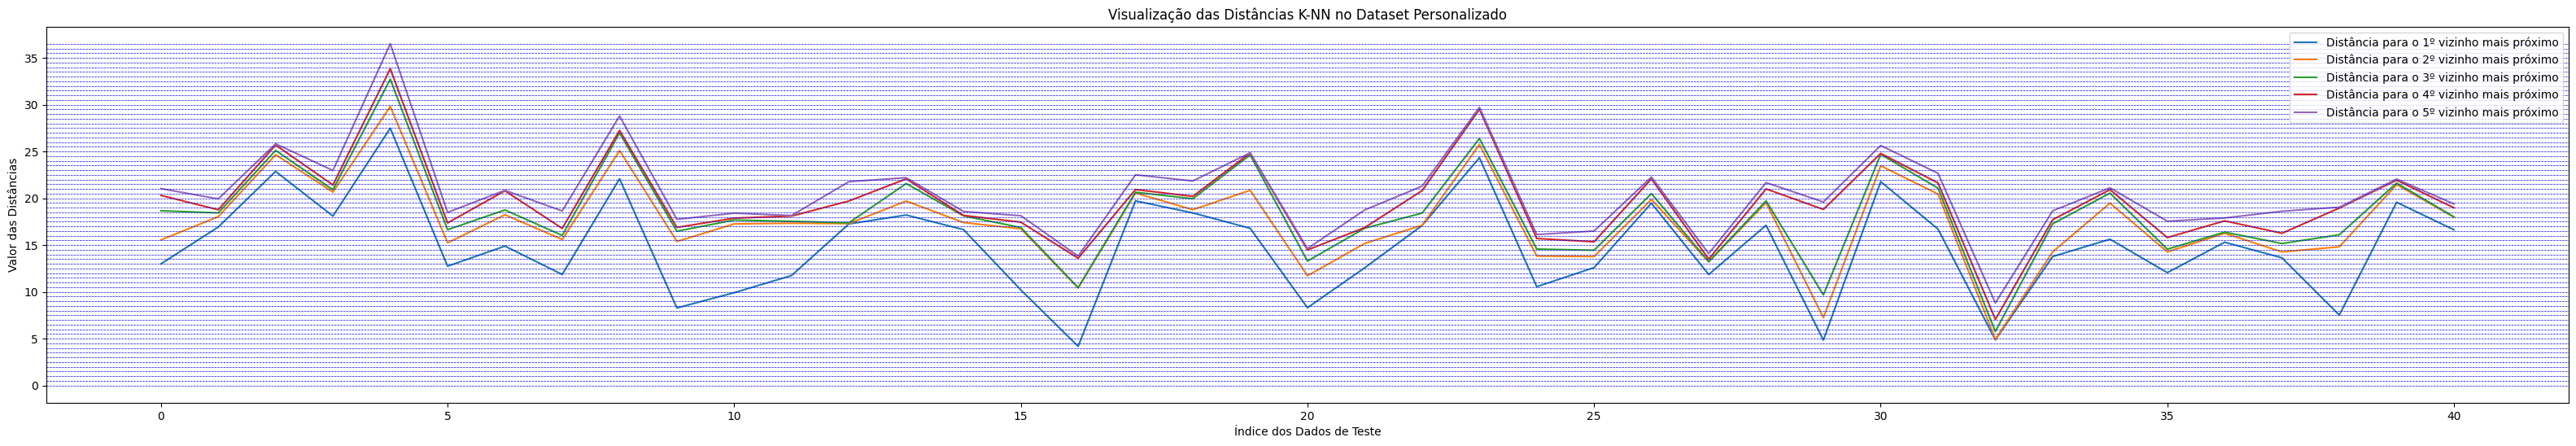

In [151]:
# Calcular as distâncias para os k vizinhos mais próximos no conjunto de teste
distancias, indices = model_knn.kneighbors(X_test_scaled, n_neighbors=5)

# Criar o gráfico com um tamanho diferente para melhor visualização
plt.figure(figsize=(40, 6))

# Plotar as distâncias para cada vizinho
for i in range(distancias.shape[1]):
    plt.plot(distancias[:, i], label=f'Distância para o {i+1}º vizinho mais próximo')

# Adicionar linhas de referência no gráfico para visualização clara
for y in np.arange(0, max(distancias.flatten()), 0.5):
    plt.axhline(y=y, color='blue', linestyle='--', linewidth=0.5)

# Título e labels do gráfico ajustados
plt.title('Visualização das Distâncias K-NN no Dataset Personalizado')
plt.xlabel('Índice dos Dados de Teste')
plt.ylabel('Valor das Distâncias')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

## Avaliação do modelo **K-NN**

**1. Desempenho Geral:**

- A acurácia do modelo foi de `0.927 (92.7%)`, indicando um bom desempenho global na previsão das classes.

<br>

**2. Matriz de Confusão:**

- A classe **Barato** foi perfeitamente prevista (30 amostras corretamente classificadas, 0 erros).
- A classe **Acessível** foi completamente mal classificada, com todas as suas 3 amostras sendo previstas incorretamente como **Barato**.
- A classe **Caro** teve um desempenho perfeito, com todas as 8 amostras corretamente classificadas.

<br>

**3. Relatório de Classificação:**

- A classe **Barato** apresentou excelente precisão (`0.91`), recall (`1.00`) e **F1-score** (`0.95`), o que reflete um equilíbrio entre prever corretamente e capturar todas as instâncias da classe.
- A classe **Caro** teve desempenho ideal com valores perfeitos de precisão, recall e **F1-score** (`1.00`).
- A classe **Acessível**, no entanto, apresentou recall e precisão de `0.00`, indicando que o modelo não conseguiu prever essa classe corretamente.

Acurácia: 0.927

Relatório de Classificação:
              precision    recall  f1-score   support

   Acessível       0.00      0.00      0.00         3
      Barato       0.91      1.00      0.95        30
        Caro       1.00      1.00      1.00         8

    accuracy                           0.93        41
   macro avg       0.64      0.67      0.65        41
weighted avg       0.86      0.93      0.89        41



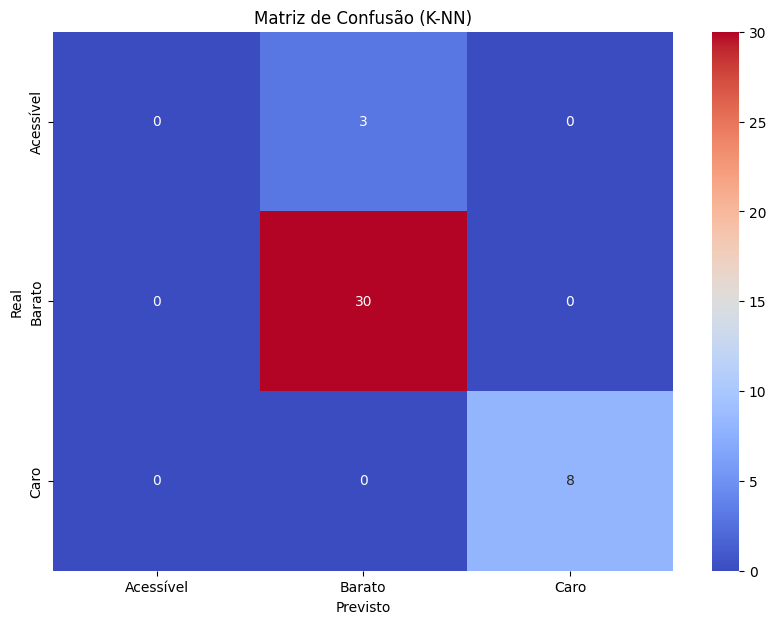

In [152]:
# Fazer previsões no conjunto de teste
y_pred_knn = model_knn.predict(X_test_scaled)

# Calcular a acurácia do modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Acurácia: {accuracy_knn:.3f}")

# Exibir o relatório de classificação com zero_division configurado
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_knn, zero_division=0))

# Criar a matriz de confusão
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Visualizar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão (K-NN)")
plt.show()

## Procura pelos Melhores Parâmetros

Uso do `GridSearchCV` para encontrar os melhores parâmetros do modelo K-Nearest Neighbors (KNN). Inicialmente, os rótulos dos dados de treino e teste foram codificados para valores numéricos usando o `LabelEncoder`. Depois, foi configurada uma grade de parâmetros para testar diferentes combinações, incluindo o número de vizinhos, pesos, métricas de distância e algoritmos de busca.

O processo avalia todas as combinações possíveis (96 no total) em 5 folds de validação cruzada, resultando nos melhores parâmetros:

- **Algoritmo:** auto
- **Métrica:** euclidean
- **Número de vizinhos:** 3
- **Pesos:** uniform

<br>

A melhor acurácia obtida foi de 0.9840, indicando um ótimo desempenho do modelo configurado com os parâmetros ideais.

In [153]:
from sklearn.preprocessing import LabelEncoder

# Codificar os rótulos (y_train e y_test) para valores numéricos
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Configurar os parâmetros para o GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Instanciar o modelo KNN
knn = KNeighborsClassifier()

# Configurar o GridSearchCV
grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    scoring='accuracy',
    cv=5,
    verbose=1
)

# Ajustar o GridSearchCV com o conjunto de treino
grid_search_knn.fit(X_train_scaled, y_train_encoded)

# Obter os melhores parâmetros e a melhor acurácia
melhores_parametros_knn = grid_search_knn.best_params_
melhor_acuracia_knn = grid_search_knn.best_score_

# Exibir os resultados
print(f"Melhores Parâmetros Encontrados: {melhores_parametros_knn}")
print(f"Melhor Acurácia Obtida: {melhor_acuracia_knn:.4f}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Melhores Parâmetros Encontrados: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Melhor Acurácia Obtida: 0.9107


<br><br><br>

## Método Naive Bayes

### Construção do Modelo do Método N-B

Construção de um modelo utilizando o método **Naive Bayes Gaussian**.

**1. Preenchimento de valores nulos:** Para lidar com valores ausentes no conjunto de treino escalado, foi utilizado o `SimpleImputer` com a estratégia de preenchimento pela média.

**2. Remoção de linhas inconsistentes:** Linhas que ainda contivessem valores inválidos (como `NaN`) após o preenchimento foram identificadas e removidas para garantir que o modelo recebesse apenas dados consistentes.

**3. Treino do modelo:** O modelo `GaussianNB` foi instanciado e ajustado ao conjunto de dados de treino processado. Este método é particularmente adequado para variáveis contínuas que seguem uma distribuição normal, como no caso deste conjunto de dados.

In [154]:
# Preenchendo valores nulos em X_train_scaled
imputer = SimpleImputer(strategy="mean")
X_train_scaled = imputer.fit_transform(X_train)

# Remover linhas inconsistentes
mask = ~np.isnan(X_train_scaled).any(axis=1)
X_train_scaled = X_train_scaled[mask]
y_train = y_train[mask]

# Treinar o modelo GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)


GaussianNB()

### Implementação e Visualização do Método N-B

Implementação e visualização do modelo **Naive Bayes Gaussian** aplicado aos dados de teste, destacando as probabilidades preditas para cada classe.

**1. Processamento dos dados:**

- Foram preenchidos valores nulos nos conjuntos de treino e teste com a média.

**2. Treino do modelo:**

- O modelo `GaussianNB` foi treinado utilizando os dados processados.

**3. Previsão das probabilidades:**

- O modelo gerou previsões de probabilidade para cada ponto no conjunto de teste, indicando a probabilidade de um ponto pertencer a cada uma das classes (`Acessível`, `Barato`, `Caro`).

**4. Visualização:**

- O gráfico de linhas exibe as probabilidades preditas para cada classe ao longo dos índices dos dados de teste.
- Cada linha colorida representa uma classe específica, mostrando como a probabilidade varia por ponto de teste.
- Linhas horizontais cinzas foram adicionadas como referência visual para diferentes níveis de probabilidade.

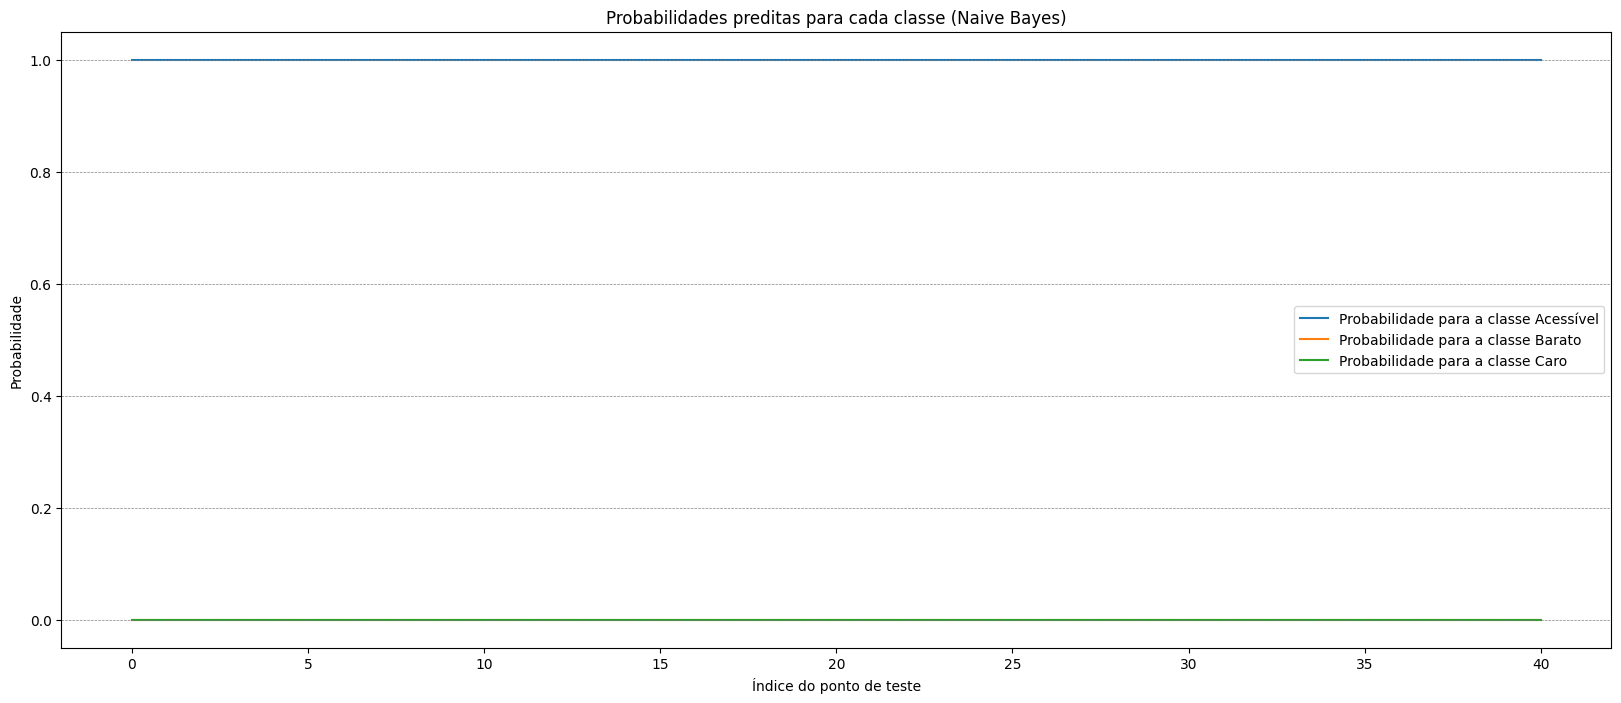

In [155]:
# Remover valores nulos dos dados de treino e teste
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Treinar o modelo GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)  # Treinamento do modelo

# Prever probabilidades para os dados de teste
probs = model_nb.predict_proba(X_test_scaled)

# Criar a figura para plotar
plt.figure(figsize=(20, 8))

# Plotar as probabilidades para cada classe
for i in range(probs.shape[1]):  # Iterar sobre as classes
    plt.plot(probs[:, i], label=f"Probabilidade para a classe {model_nb.classes_[i]}")

# Adicionar linhas de referência no gráfico (opcional)
for y in np.arange(0, 1.1, 0.2):
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

# Título e rótulos do gráfico
plt.title("Probabilidades preditas para cada classe (Naive Bayes)")
plt.xlabel("Índice do ponto de teste")
plt.ylabel("Probabilidade")

# Adicionar a legenda
plt.legend()

# Exibir o gráfico
plt.show()

### Model Assessment

Avaliação do modelo **Naive Bayes** aplicado aos dados de teste, mostrando as métricas de desempenho e a matriz de confusão.

**1. Previsões:**

- O modelo gerou previsões para o conjunto de teste.

**2. Métricas de desempenho:**

- A acurácia do modelo é **0.07 (7%)**.
- O relatório de classificação indica baixa precisão, recall e F1-score para todas as classes, especialmente para as classes `Barato` e `Caro`, onde o modelo falha completamente em fazer previsões corretas.

**3. Matriz de Confusão:**

- Mostra a distribuição entre os valores reais e os preditos.
As únicas previsões corretas foram 3 amostras da classe `Acessível`.
- Todas as amostras das classes `Barato` e `Caro` foram classificadas erroneamente como `Acessível`.

Accuracy: 0.07

Classification Report:
              precision    recall  f1-score   support

   Acessível       0.07      1.00      0.14         3
      Barato       0.00      0.00      0.00        30
        Caro       0.00      0.00      0.00         8

    accuracy                           0.07        41
   macro avg       0.02      0.33      0.05        41
weighted avg       0.01      0.07      0.01        41



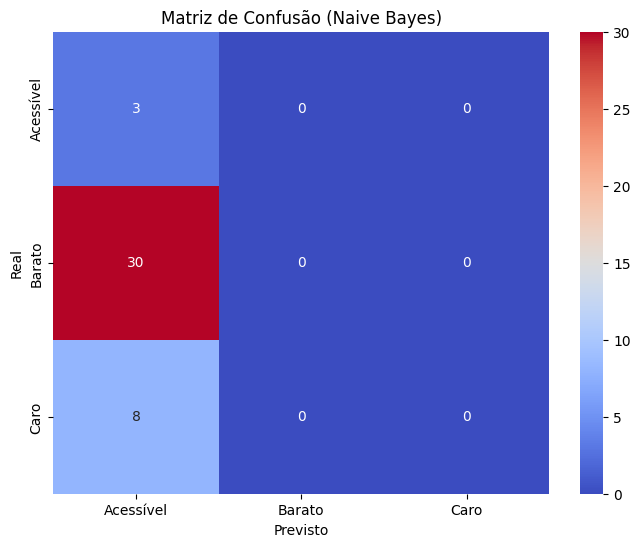

In [156]:
# Previsões no conjunto de teste
y_pred = model_nb.predict(X_test_scaled)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Exibir o relatório de classificação com zero_division
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão com tons de roxo e vermelho
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',  # Alteração para cmap 'coolwarm'
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão (Naive Bayes)')
plt.show()

### Cálculo e Visualização dos Melhores Parâmetros

O modelo **Gaussian Naive Bayes** foi otimizado utilizando uma busca em grade `(GridSearchCV)` para encontrar o melhor parâmetro de suavização `(var_smoothing)`. A suavização é um parâmetro importante no modelo Naive Bayes, pois evita que probabilidades muito pequenas sejam consideradas, melhorando a estabilidade do modelo.

- **Melhores Parâmetros Encontrados:** O valor ideal de `var_smoothing` foi `5e-06`, indicando que uma suavização relativamente pequena é suficiente para o conjunto de dados. Isso significa que o modelo não depende excessivamente de ajustes mais finos, mantendo um bom equilíbrio entre precisão e generalização.

- **Melhor Acurácia Obtida:** A melhor acurácia alcançada durante a validação cruzada foi de `96,21%`, um resultado excelente, mostrando que o modelo é altamente eficiente para este conjunto de dados. Este desempenho sugere que os dados possuem características bem definidas que o modelo consegue capturar de maneira eficiente.

In [157]:
# Definir os intervalos de parâmetros para o GridSearch
parametros_nb = {
    'var_smoothing': [
        1e-10, 1e-9, 1e-8, 1e-7, 5e-6, 1e-5, 5e-4, 1e-3, 1e-2, 1.0, 5.0, 25.0, 50.0, 100.0, 500.0, 1000.0
    ]
}

# Instanciar o modelo Gaussian Naive Bayes
modelo_nb = GaussianNB()

# Configurar o GridSearchCV
busca_parametros_nb = GridSearchCV(
    estimator=modelo_nb,
    param_grid=parametros_nb,
    scoring='accuracy',
    cv=4,  # Usando 4 folds
    verbose=1
)

# Ajustar o GridSearch aos dados de treino
busca_parametros_nb.fit(X_train_scaled, y_train)

# Obter os melhores parâmetros e a melhor acurácia
melhores_parametros_nb = busca_parametros_nb.best_params_
melhor_acuracia_nb = busca_parametros_nb.best_score_

# Exibir os resultados
print(f"Melhores Parâmetros Encontrados: {melhores_parametros_nb}")
print(f"Melhor Acurácia Obtida: {melhor_acuracia_nb:.4f}")

Fitting 4 folds for each of 16 candidates, totalling 64 fits
Melhores Parâmetros Encontrados: {'var_smoothing': 5e-06}
Melhor Acurácia Obtida: 0.9677
